In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('train.csv')

# Preprocess the dataset
# Convert categorical columns into numeric
# For simplicity, we'll drop columns that are not necessary for modeling (e.g., 'Name', 'Ticket', 'Cabin')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Convert categorical features into numeric values (Sex, Embarked)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # 'S', 'C', 'Q' to numeric

# Handle missing values (impute with the median for simplicity)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Mode is used for Embarked

# Features and target variable
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


<ipython-input-11-ca7102c51cf1>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-11-ca7102c51cf1>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Accuracy: 0.8212
Confusion Matrix:
[[91 14]
 [18 56]]


Accuracy with n_estimators=10: 1.0
Accuracy with n_estimators=10: 1.0
Accuracy with n_estimators=50: 1.0
Accuracy with n_estimators=100: 1.0
Accuracy with n_estimators=200: 1.0
Accuracy with n_estimators=500: 1.0


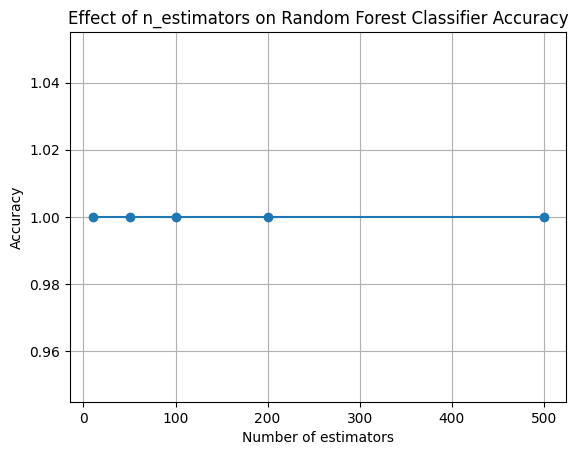

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestClassifier with default n_estimators=10
clf = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
score_default = accuracy_score(y_test, y_pred)
print(f"Accuracy with n_estimators=10: {score_default}")

# Fine-tune the model by changing the value of n_estimators
n_estimators_values = [10, 50, 100, 200, 500]
scores = []

for n in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f"Accuracy with n_estimators={n}: {score}")

# Plot the results
plt.plot(n_estimators_values, scores, marker='o')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Random Forest Classifier Accuracy')
plt.grid(True)
plt.show()
